# Hug Me, Brother! The Improbable Rise of Linus Ullmark and Jeremy Swayman
<br>Sources: __[nhl.com](https://nhl.com/stats)__ and __[Moneypuck](https://moneypuck.com)__
<br>__[Brennan Bushee](https://www.linkedin.com/in/brennan-bushee-268273b8/)__
<br>



# Introduction:
Over the 2022-23 NHL season, Linus Ullmark of the Boston Bruins had a dream season seemingly out of nowhere. He was, across the board, the best goalie in the league, and he even became one of only a handful of NHL goalies ever to score a goal.  Perhaps even more remarkably, the Bruins' other goalie, Jeremy Swayman, was not far behind according to conventional statistics. However, the Bruins couldn't afford to keep both in the long run, and they traded away Ullmark and offered Swayman the fat, 8-year contract. During their time together in Boston, Ullmark and Swayman's celebration after a win made lots of news and generated a lot of buzz on social media, even among non-hockey fans.![Goalie hug](img/hug-63b3701457ecf-scaled.webp)

Required Disclosure: I am a Bruins fan.

## Have we ever seen a year-over-year improvement of this magnitude?
The Sabres were a mediocre-to-bad team for Ullmark's entire stint in Buffalo, but 2022-23 was his second year in Boston. It would stand to reason that a goalie's basic stats, save percentage and goals against average (GAA), would improve after moving to a better team. If the defense does its job, it is easier to save shots that originate far from the net and not from a rebound the defense failed to clear. If one subscribes to the notion that the best defense is a good offense, all the time your team is on the attack is time the opponent will not get to spend on the attack, so a goalie will consequently allow fewer goals per game.  I can think of other one-year wonders, but was any of them far and away the best goalie in the league? My analysis can only go back as far as the  2008-09 season, when "big data" became a buzzword and the analytics craze came to hockey. I only considered goalies who played more than 25 games in any given season (or 20 games in the 2012-13 and 2019-20 seasons, which were cut short by the lockout and the pandemic, respectively).

In [1]:
# Filepath: nhl_goalie_stats_processor.py
import os
import pandas as pd


def process_goalie_stats(data_dir: str) -> pd.DataFrame:
    """
    Processes NHL goalie stats by adding season columns and concatenating them.
    
    Args:
        data_dir (str): Path to the directory containing CSV files.

    Returns:
        pd.DataFrame: Concatenated DataFrame with 'Season' column.
    """
    all_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    dataframes = []

    for file in all_files:
        season = os.path.splitext(file)[0]  # Extract season from filename
        df = pd.read_csv(os.path.join(data_dir, file))
        df['Season'] = season  # Add season column
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df.sort_values(by=['Name', 'Season'], inplace=True)
    return combined_df


def calculate_year_over_year_changes(df: pd.DataFrame, stat_cols: list) -> pd.DataFrame:
    """
    Calculates year-over-year changes for specified statistics.

    Args:
        df (pd.DataFrame): Processed goalie stats DataFrame.
        stat_cols (list): List of statistical columns to measure changes.

    Returns:
        pd.DataFrame: Updated DataFrame with YoY change columns.
    """
    # Ensure season is treated as a categorical variable for sorting
    df['Season'] = pd.Categorical(df['Season'], ordered=True)

    # Calculate YoY changes for each player
    for stat in stat_cols:
        # Calculate percentage change
        df[f'{stat}_YoY_Change'] = df.groupby('Name')[stat].pct_change() * 100  # % change
        stat_camel = stat.replace(' ', '_')
        # Calculate raw difference
        df[f'{stat_camel}_YoY_Diff'] = df.groupby('Name')[stat].diff()

    return df


# Example Usage
#


In [2]:
'GAA Better Than Expected'.replace(' ', '_')

'GAA_Better_Than_Expected'

### Metrics
What advanced statistics can we choose to isolate a goalie's performance from how the team played in front of him? There can't be too many, or else these data points will be difficult to graph and visualize. 
- Goals Against Average Better than Expected: Calculate the expected goals for the opponent based on their shot chart and the historical probability of scoring from each spot. Compare that to the actual number of goals the opponent scored. 
- High Danger Opportinity Save Percentage: The good people at moneypuck.com did a lot of the legwork in this aspect: they define a "High Danger Opportunity" as "Unblocked Shot attempts with >= 20% probability of being a goal. High danger shots account for ~5% of shots and ~33% of goals." These kinds of shots are where a goalie earns his pay. 
- Wins Above Replacement (WAR): A trendy statistic borrowed from baseball. In how many games was this goalie the difference between winning and losing? The baseline is an "average" goalie. Suppose that the team won by a goal, and according to the above metrics, their goalie saved 1.3 goals (over the baseline), then it is safe to say the goalie was the difference maker. 

In [3]:
import pandas as pd
from glob import glob
import os
adv_stats_files = sorted(glob('data/csv/extracted_stats_with_names_*.csv'))
adv_stats_df = pd.concat((pd.read_csv(file) for file in adv_stats_files))
adv_stats_df.sort_values(by=['Name', 'Season'], inplace=True)
stat_cols = ['GAA Better Than Expected', 'Wins Above Replacement']  # Example metrics for goalies
result_df = calculate_year_over_year_changes(adv_stats_df, stat_cols)
result_df.query("Name == 'Linus Ullmark'")

,Season,Name,GAA Better Than Expected,High Danger Unblocked Shot Attempt Save % Above Expected,Wins Above Replacement,xGAA,GAA Better Than Expected_YoY_Change,GAA_Better_Than_Expected_YoY_Diff,Wins Above Replacement_YoY_Change,Wins_Above_Replacement_YoY_Diff
34,2018-19,Linus Ullmark,-0.43,-0.007,-2.51,2.69,NaN,NaN,NaN,NaN
27,2019-20,Linus Ullmark,-0.19,-0.089,-1.06,2.54,-55.813953,0.24,-57.768924,1.45
16,2021-22,Linus Ullmark,0.15,-0.010,0.95,2.59,-178.947368,0.34,-189.622642,2.01
2,2022-23,Linus Ullmark,0.88,0.078,7.07,2.78,486.666667,0.73,644.210526,6.12
6,2023-24,Linus Ullmark,0.37,0.015,2.46,2.94,-57.954545,-0.51,-65.205092,-4.61


In [4]:
result_df.query("Name == 'Tim Thomas'")

,Season,Name,GAA Better Than Expected,High Danger Unblocked Shot Attempt Save % Above Expected,Wins Above Replacement,xGAA,GAA Better Than Expected_YoY_Change,GAA_Better_Than_Expected_YoY_Diff,Wins Above Replacement_YoY_Change,Wins_Above_Replacement_YoY_Diff
0,2008-09,Tim Thomas,0.47,0.072,4.19,2.57,NaN,NaN,NaN,NaN
0,2010-11,Tim Thomas,0.71,0.040,6.59,2.70,51.063830,0.24,57.279236,2.40
27,2011-12,Tim Thomas,-0.05,-0.018,-0.45,2.31,-107.042254,-0.76,-106.828528,-7.04
33,2013-14,Tim Thomas,-0.24,-0.083,-1.72,2.68,380.000000,-0.19,282.222222,-1.27


In [6]:
import matplotlib.pyplot as plt
plt.hist(result_df['Wins Above Replacement_YoY_Diff']), plt.hist(result_df['GAA Better Than Expected_YoY_Diff'])


KeyError: 'Wins Above Replacement_YoY_Diff'

((array([ 6., 21., 41., 96., 98., 99., 64., 33., 13.,  3.]),
  array([-1.08, -0.86, -0.64, -0.42, -0.2 ,  0.02,  0.24,  0.46,  0.68,
          0.9 ,  1.12]),
  <BarContainer object of 10 artists>),
 (array([  2.,   7.,  10.,  51., 118., 159., 156.,  89.,  32.,   5.]),
  array([-0.23  , -0.1896, -0.1492, -0.1088, -0.0684, -0.028 ,  0.0124,
          0.0528,  0.0932,  0.1336,  0.174 ]),
  <BarContainer object of 10 artists>))

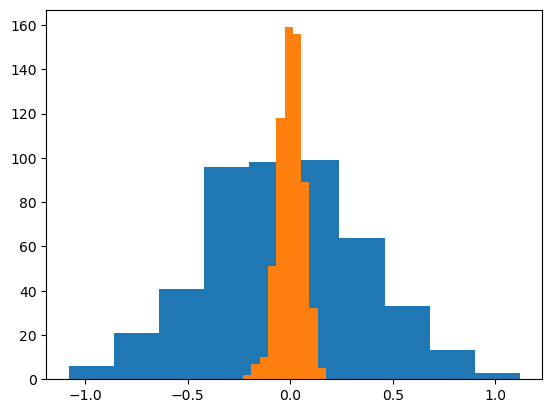

In [93]:
plt.hist(result_df['GAA Better Than Expected_YoY_Diff']), plt.hist(result_df['High Danger Unblocked Shot Attempt Save % Above Expected']) 

The histogram serves as a sanity check and an eyeball test for these statistics: as one would expect, both are concentrated around 0, just to differing degrees. For the "High Danger Opportunities" metric, there is so little variability that the year-over-year difference is of limited use. 

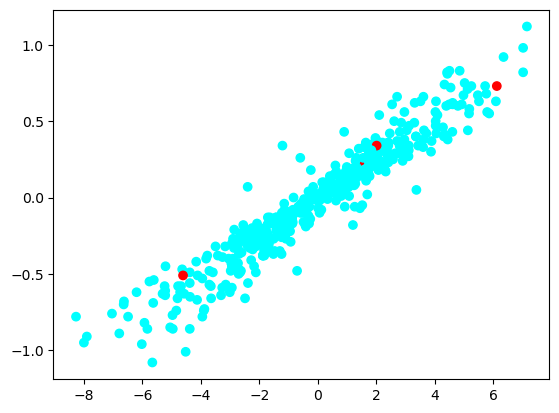

In [7]:
colors = result_df['Name'].eq("Linus Ullmark").map({True: 'red', False: 'cyan'})

plt.scatter(result_df['Wins_Above_Replacement_YoY_Diff'], result_df['GAA_Better_Than_Expected_YoY_Diff'], c=colors)

As it turns out, only a handful of goalies have shown year-over-year improvements of this size in both these categories in a single season.

In [8]:
result_df.dropna().query('GAA_Better_Than_Expected_YoY_Diff > 0.72 and Wins_Above_Replacement_YoY_Diff > 6.11' ).sort_values(by='GAA_Better_Than_Expected_YoY_Diff')

,Season,Name,GAA Better Than Expected,High Danger Unblocked Shot Attempt Save % Above Expected,Wins Above Replacement,xGAA,GAA Better Than Expected_YoY_Change,GAA_Better_Than_Expected_YoY_Diff,Wins Above Replacement_YoY_Change,Wins_Above_Replacement_YoY_Diff
2,2022-23,Linus Ullmark,0.88,0.078,7.07,2.78,486.666667,0.73,644.210526,6.12
3,2021-22,Frederik Andersen,0.54,0.083,4.64,2.71,-292.857143,0.82,-294.957983,7.02
21,2013-14,Steve Mason,-0.05,-0.004,-0.47,2.45,-94.845361,0.92,-93.108504,6.35
4,2011-12,Brian Elliott,0.51,0.063,3.11,2.08,-208.510638,0.98,-179.539642,7.02
4,2014-15,Devan Dubnyk,0.38,0.027,3.46,2.47,-151.351351,1.12,-193.766938,7.15


## What about the Hamburglar?
I can already imagine Senators fans asking if I considered the improbable rise of Andrew Hammond in 2014-15. He was called up late in the season from their minor league affiliate in Binghamton and led them all the way to the playoffs. I was wondering why he wasn't showing up anywhere: I had previously set my minimum at 25 games played only to realize that he played 24 that year, so I copy-pasted his stats into my data file. Here's where he ranks:

Compared to the other Senators' other two goalies, I don't see much of a difference in expected goals against, which points away from the hypothesis that the team was playing better in front of the guy who just got called up from the minors. By any measure, Hammond's performance was impressive, but Anderson and Lehner were no slouches. Anderson was away from the team temporarily after his wife had a baby, and Lehner was pulled after an extraordinarily bad night at the office in Detroit, which weighs on his stats especially heavily because he played so few games. In this first plot, Anderson and Lehner appear to be around and about average. 


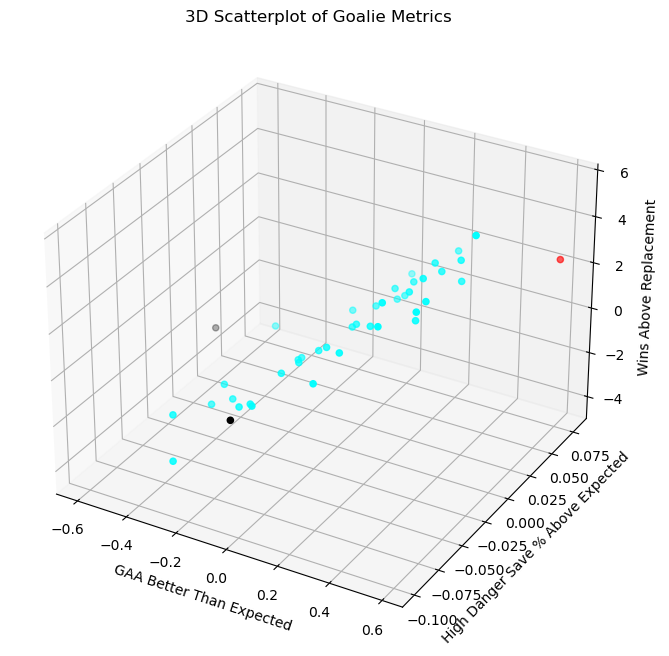

In [9]:
# Filepath: nhl_goalie_3d_plot.py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import plotly.express as px
import pandas as pd
import numpy as np

def plot_3d_scatter(df: pd.DataFrame):
    # Extract data
    x = df['GAA Better Than Expected']
    z = df['Wins Above Replacement']
    y = df['High Danger Unblocked Shot Attempt Save % Above Expected']
    labels = df['Name'] # + ' (' + df['season'] + ')'

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    #colors = df['Name'].eq("Andrew Hammond").map({True: 'red', False: 'blue'})
    # Create a color column using pandas .map()
    colors = df['Name'].map(lambda x: 'red' if x == "Andrew Hammond" 
                             else 'black' if x in ["Craig Anderson", "Robin Lehner"] 
                             else 'cyan')

    ax.scatter(x,y,z,c=colors)
    # ax.text(x, y, z, labels, size=8)
    # Plot all points
    # for i in range(len(df)):
    #     # Create a 'color' column based on the condition
    #     ax.scatter(x[i], y[i], z[i], c=colors, marker='o')

    #     # Annotate each point
    #     ax.text(x[i], y[i], z[i], labels[i], size=8)

    # Axis labels
    ax.set_xlabel('GAA Better Than Expected')
    ax.set_zlabel('Wins Above Replacement')
    ax.set_ylabel('High Danger Save % Above Expected')
    ax.set_title('3D Scatterplot of Goalie Metrics')

    plt.show()


# Example Usage
# Replace with your data file path
df_hamburglar = result_df.query("Season == '2014-15'")

# Call the function
plot_3d_scatter(df_hamburglar)


However, WAR is inherently biased toward people who play more games. When controlling for number of games played, it appears that Hammond was far and away the best goalie in the league. This next plot, effectively a view of the previous one from above,  makes it clearer that Anderson's play was right around average. I argue that this "bias" of WAR is hardly bias at all. Extrapolating stats like these over a whole season, or even 48 games, ignores the phenomenon of players "coming back down to Earth", or regressing to the mean, after extraordinary streaks. This is the more plausible explanation for nearly all the supposed "curses", including the Sports Illustrated Curse, the Madden Curse, and the Kardashian Kurse. 

In [17]:
df_hamburglar.query("Name == 'Andrew Hammond'")

,Season,Name,GAA Better Than Expected,High Danger Unblocked Shot Attempt Save % Above Expected,Wins Above Replacement,xGAA,GAA Better Than Expected_YoY_Change,GAA_Better_Than_Expected_YoY_Diff,Wins Above Replacement_YoY_Change,Wins_Above_Replacement_YoY_Diff
42,2014-15,Andrew Hammond,0.59,0.078,2.33,2.38,NaN,NaN,NaN,NaN


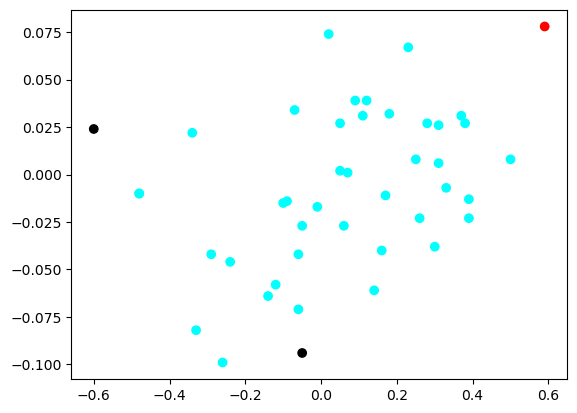

In [10]:
colors = df_hamburglar['Name'].map(lambda x: 'red' if x == "Andrew Hammond" 
                             else 'black' if x in ["Craig Anderson", "Robin Lehner"] 
                             else 'cyan')
plt.scatter(df_hamburglar['GAA Better Than Expected'], 
            df_hamburglar['High Danger Unblocked Shot Attempt Save % Above Expected'],
            c=colors)

## Does this mean Ullmark was really the better goalie? 
As a player myself (a winger-- I could never have been a goalie), I can think of a few reasons there may be a difference in stats between two goalies on the same team. 
- Every goalie needs a night off once in a while: if you are playing against a bad team (or at least a bad offensive team), the coach may feel comfortable letting the backup goalie play. 
- If the starting goalie performs poorly and gives up too many goals in too little time, the coach may put the backup goalie in to spare the starting goalie any further embarrassment and send a message, explicitly or otherwise, to the rest of the team, that will inspire them to play better. 
- In either case, the rest of the team might pay a little more attention in their own end of the rink knowing that the backup goalie is in net. 
In the Bruins' case, for this whole time period, they have considered it prudent to have two serviceable veteran goalies on the roster: there has not necessasrily been a  Goalie #1 and Goalie #2, but rather 1a and 1b. Such was the case with Jeremy Swayman, a 1st round draft pick of the Bruins, and Linus Ullmark, who toiled in relative obscurity in Buffalo before signing with Boston. It was unclear who was 1a and who was 1b because they played almost the same number of games.  

### Did he face inferior competition? Did the team play better in front of him in any measurable way?


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Create DataFrame
df = pd.read_csv('data/csv/schedule_2022_23.csv')
df['Game Date'] = pd.to_datetime(df['Game Date'])
df.set_index(df['Game Date'])
# Assign colors for categories
colors = {'A': 'red', 'B': 'blue', 'C': 'green'}
df.head()

,Game Date,Opponent,Team,Opp.,Result
0,2022-10-12,Washington,5,2,Win
1,2022-10-15,Arizona,6,3,Win
2,2022-10-17,Florida,5,3,Win
3,2022-10-18,Ottawa,5,7,Loss
4,2022-10-20,Anaheim,2,1,Win


,Team,P%,GF/GP,XGF/60
1,Carolina,0.689,3.20,3.58
2,New Jersey,0.683,3.52,3.63
3,Vegas,0.677,3.26,3.18
4,Toronto,0.677,3.39,3.46
5,Colorado,0.665,3.34,3.16
6,Edmonton,0.665,3.96,3.76
7,Dallas,0.659,3.43,NaN
8,New York Rangers,0.652,3.33,NaN
9,Los Angeles,0.634,3.34,NaN
10,Minnesota,0.628,2.91,NaN


In [26]:
df_team = pd.read_csv('data/csv/teamstats_2022_23.csv').drop([0])
df_team_subset = df_team[['Team','P%', 'GF/GP', 'XGF/60']]
df_team_subset['P%'].mean(), df_team_subset['P%'].median(), df_team_subset['P%'].std()

(0.5490645161290322, 0.561, 0.10624529338089006)

In [27]:
gf_gp = df_team_subset['XGF/60']
gf_gp.mean(), gf_gp.median(), gf_gp.std()

(3.1574074074074074, 3.16, 0.3798642732567332)

In [28]:
df_goalie = pd.read_csv('data/csv/Advanced_by_game 2.csv')
df_goalie['Game Date'] = pd.to_datetime(df['Game Date'])
df_goalie.set_index(df_goalie['Game Date'])
# Assign colors for categories
colors = {'A': 'red', 'B': 'blue', 'C': 'green'}
merged_df = pd.merge(df, df_goalie, on='Game Date', how='inner')  # 'inner' keeps only matching rows
merged_df.head()

,Game Date,Opponent,Team_x,Opp.,Result,Player,Team_y,S/C,GP,GS,...,GS > .900 %,GF,GA,GFA,GAA,ROW,ROL,SA/60,Sv%,TOI
0,2022-10-12,Washington,5,2,Win,Linus Ullmark,BOS,L,1,1,...,100,3,1,3.00,1.00,1,0,27.0,0.963,60:00
1,2022-10-15,Arizona,6,3,Win,Linus Ullmark,BOS,L,1,1,...,100,3,1,3.03,1.01,1,0,32.3,0.969,59:24
2,2022-10-17,Florida,5,3,Win,Keith Kinkaid,BOS,L,1,1,...,100,3,1,3.01,1.00,1,0,31.1,0.968,59:54
3,2022-10-18,Ottawa,5,7,Loss,Linus Ullmark,BOS,L,1,1,...,100,5,2,5.00,2.00,1,0,31.0,0.935,60:00
4,2022-10-20,Anaheim,2,1,Win,Linus Ullmark,BOS,L,1,1,...,100,4,1,4.02,1.01,1,0,23.1,0.957,59:40


In [29]:
# Merge with filtered df_team
final_df = pd.merge(merged_df, df_team_subset, left_on='Opponent', right_on='Team', how='inner')

# Drop the "Team" column and keep "Opponent"
final_df = final_df.drop(columns=['Team'])

final_df.head()


,Game Date,Opponent,Team_x,Opp.,Result,Player,Team_y,S/C,GP,GS,...,GFA,GAA,ROW,ROL,SA/60,Sv%,TOI,P%,GF/GP,XGF/60
0,2022-10-12,Washington,5,2,Win,Linus Ullmark,BOS,L,1,1,...,3.00,1.00,1,0,27.0,0.963,60:00,0.488,3.09,3.12
1,2023-02-11,Washington,1,2,Loss,Linus Ullmark,BOS,L,1,1,...,4.01,2.00,1,0,26.0,0.923,59:55,0.488,3.09,3.12
2,2022-10-15,Arizona,6,3,Win,Linus Ullmark,BOS,L,1,1,...,3.03,1.01,1,0,32.3,0.969,59:24,0.427,2.74,2.68
3,2022-12-09,Arizona,3,4,Loss,Linus Ullmark,BOS,L,1,1,...,2.01,1.01,1,0,27.1,0.963,59:42,0.427,2.74,2.68
4,2022-10-17,Florida,5,3,Win,Keith Kinkaid,BOS,L,1,1,...,3.01,1.00,1,0,31.1,0.968,59:54,0.561,3.51,3.80


In [30]:
# Calculate the mean of 'P%' grouped by 'Player'
mean_p_by_player = final_df.groupby('Player')['P%'].mean()
mean_gf_by_player = final_df.groupby('Player')['XGF/60'].mean()
mean_gf_by_player, mean_p_by_player

(Player
 Jeremy Swayman    3.332222
 Keith Kinkaid     3.800000
 Linus Ullmark     3.144706
 Name: XGF/60, dtype: float64,
 Player
 Jeremy Swayman    0.590031
 Keith Kinkaid     0.561000
 Linus Ullmark     0.533263
 Name: P%, dtype: float64)

What are the odds of getting such a difference randomly? These margins are razor-thin, indicating they faced equally strong opponents in aggregate. Expected goals for per 60 minutes (XGF/60) is a proxy measure for how many scoring chances the opposing team generates, and there is only a minuscule difference in that as well. This may be enough to conclude that Ullmark played better in goal, but probably not enough to justify abandoning this 50/50 split in the playoffs and having Ullmark start every game. The equal division of labor may well have contributed to both their good performances.

## To anyone who says the Bruins traded away the wrong guy:


Up until Ullmark was traded, the one thing Swayman consistently did better than Ullmark was save these "high danger" opportunities, which is when a goalie earns his money. 

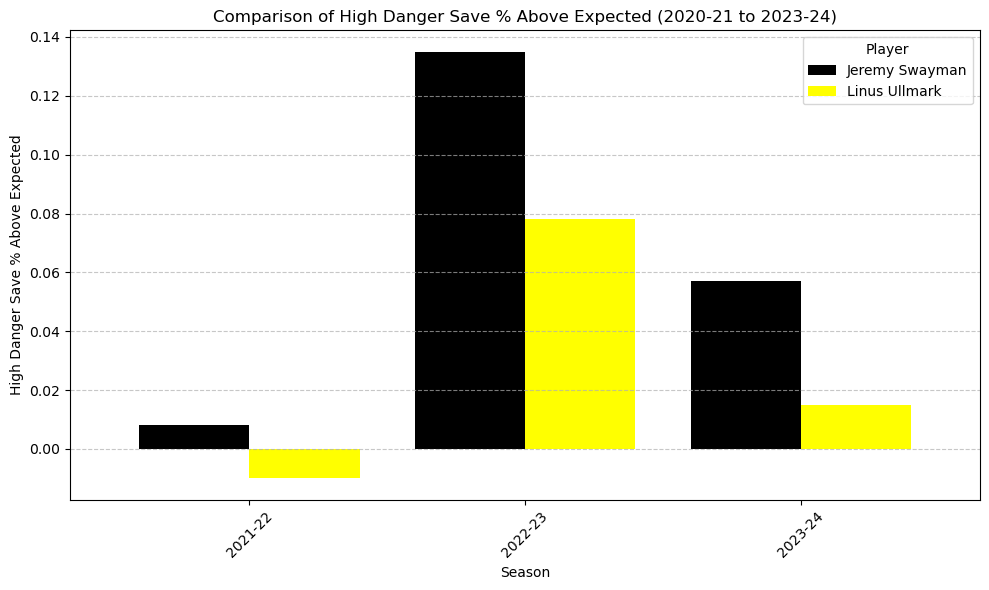

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
#df = pd.read_csv("processed_goalie_stats.csv")

def plot_save_percentage_comparison(df: pd.DataFrame):
    """
    Plots 'High Danger Unblocked Shot Attempt Save % Above Expected' for Linus Ullmark and Jeremy Swayman.

    Args:
        df (pd.DataFrame): DataFrame containing goalie stats.

    Returns:
        None
    """
    # Filter data for specific players and seasons
    filtered_df = df[(df['Name'].isin(['Linus Ullmark', 'Jeremy Swayman'])) & 
                     (df['Season'].isin(['2021-22', '2022-23', '2023-24']))]

    # Pivot data for easier plotting
    pivot_df = filtered_df.pivot(index='Season', columns='Name', 
                                 values='High Danger Unblocked Shot Attempt Save % Above Expected')

    # Plot the data
    # Plot bar chart
    ax = pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8, color=['black', 'yellow'])

    # Labels and Title
    plt.xlabel('Season')
    plt.ylabel('High Danger Save % Above Expected')
    plt.title('Comparison of High Danger Save % Above Expected (2021-22 to 2023-24)')
    plt.legend(title='Player')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot the comparison
plot_save_percentage_comparison(result_df)


Ullmark won the Vézina trophy in 2022-23, which is awarded to the league's best goalie, but what a year it was for goaltending in the NHL. I thought that Tim Thomas's Herculean effort in the Bruins' 2010-11 championship season was the greatest feat of goaltending I would witness in my lifetime, but Ullmark and Juuse Saros of Nashville both surpassed it in the same season. In terms of Wins Above Replacement, Saros ranks above Ullmark. The Bruins, however, had the best regular season in NHL history, and voters may have wanted to give credit for that where credit was due. An argument could have been made for Saros for the Vézina, but Saros had greatness thrust upon him because Nashville gave up so many more scoring chances, as evidenced by their expected goals against average (xGAA) of 3.43. 

In [146]:
result_df.sort_values('Wins Above Replacement',ascending=False).head()

,Season,Name,GAA Better Than Expected,High Danger Unblocked Shot Attempt Save % Above Expected,Wins Above Replacement,xGAA,GAA Better Than Expected_YoY_Change,GAA_Better_Than_Expected_YoY_Diff,Wins Above Replacement_YoY_Change,Wins_Above_Replacement_YoY_Diff
0,2022-23,Juuse Saros,0.73,0.074,7.78,3.43,128.125000,0.41,125.507246,4.33
2,2022-23,Linus Ullmark,0.88,0.078,7.07,2.78,486.666667,0.73,644.210526,6.12
0,2010-11,Tim Thomas,0.71,0.040,6.59,2.70,NaN,NaN,NaN,NaN
3,2022-23,Ilya Sorokin,0.65,0.122,6.44,2.99,160.000000,0.40,202.347418,4.31
14,2016-17,Braden Holtby,0.59,0.026,5.89,2.67,55.263158,0.21,45.432099,1.84
